In [4]:
import pandas as pd 

df = pd.read_csv('data.csv')

del df['Unnamed: 4']
df.head()

,Year,Film,Song,Composer
0,2013,Kadal,Adiye,A. R. Rahman
1,2015,Kadal,Ennodu Nee Irundhaal,A. R. Rahman
2,2015,Kadal,Ennodu Nee Irundhaal(Reprise),A. R. Rahman
3,2015,Naanum Rowdy Dhaan,Yennai Mattrum Kadhale,Anirudh Ravichander
4,2016,24,Mei Nigara,A. R. Rahman


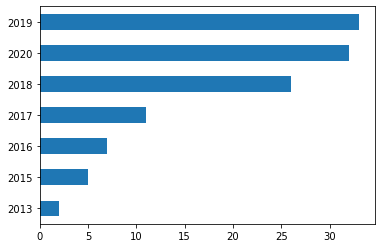

In [8]:
# How many songs has he outputted ? 
df['Year'].value_counts().sort_values().plot(kind = 'barh')


# Additional columns - actor , actresses , producer , lyrics , 

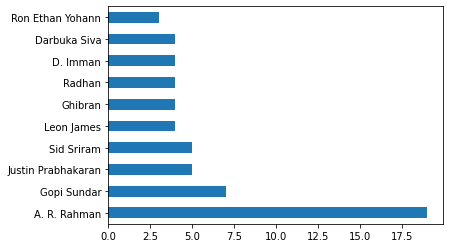

In [22]:
# # How many songs has he outputted ? 
df['Composer'].value_counts().sort_values(ascending=False)[0:10].plot(kind = 'barh')


In [29]:
! pip install webdriver_manager 
import requests 
import json 
import base64 
from selenium import webdriver 
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.chrome.options import Options 
from webdriver_manager.utils import ChromeType 
import os 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.by import By 
from bs4 import BeautifulSoup 
from selenium.webdriver.support.ui import Select 
import time 
def driver_obj():
    chrome_options_list = ['--no-sandbox','--disable-dev-shm-usage','--disable-gpu', '--start-maximized','--disable-infobars','--disable-extensions']
    chrome_options = Options()
    for i in range(0,len(chrome_options_list)):
        chrome_options.add_argument(chrome_options_list[i])
    driver = webdriver.Chrome(ChromeDriverManager(latest_release_url='https://chromedriver.storage.googleapis.com/LATEST_RELEASE',url='https://chromedriver.storage.googleapis.com').install(), options=chrome_options)
    driver.maximize_window()
    return driver


driver = driver_obj()
driver.get('https://www.google.com/search?q=' + df['Song'][2])
time.sleep(10)
aa = BeautifulSoup(driver.page_source, "html.parser")
driver.quit()


with open(str(1) + '.html', 'w',encoding='utf-8') as f:
    f.write(str(aa))



The system cannot find the path specified.
[WDM] - Current google-chrome version is 86.0.4240
[WDM] - Get LATEST driver version for 86.0.4240
[WDM] - Driver [C:\Users\raosa\.wdm\drivers\chromedriver\win32\86.0.4240.22\chromedriver.exe] found in cache


In [31]:
def mandelbrot(n_rows, n_columns, iterations, cx, cy):
    x_cor = np.linspace(-2, 2, n_rows)
    y_cor = np.linspace(-2, 2, n_columns)
    x_len = len(x_cor)
    y_len = len(y_cor)
    output = np.zeros((x_len,y_len))
    c = complex(cx, cy)
    for i in range(x_len):
        for j in range(y_len):
            z = complex(x_cor[i], y_cor[j])
            count = 0
            for k in range(iterations):
                z = (z * z) + c
                count = count + 1
                if (abs(z) > 4):
                    break
            output[i,j] = count
        print(int((i/x_len)*100),"% completed")

print(output)
plt.imshow(output.T, cmap='hot')
plt.axis("off")
plt.show()

NameError: name 'output' is not defined

'https://www.google.com/search?q=Ennodu Nee Irundhaal(Reprise)'